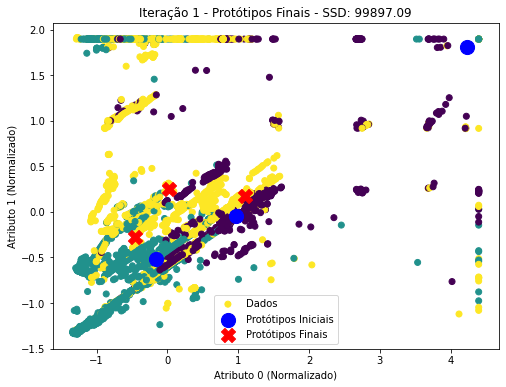

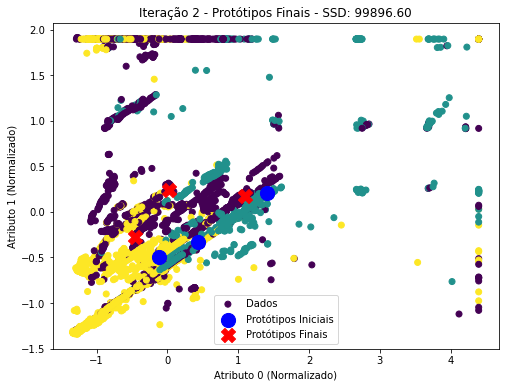

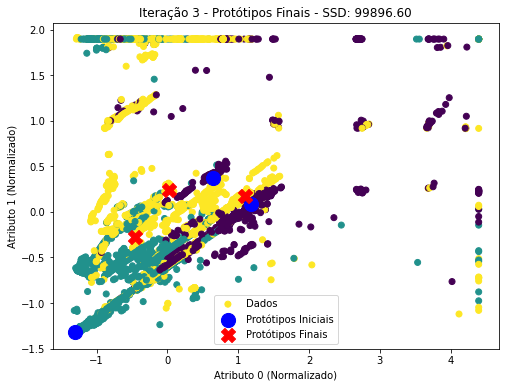

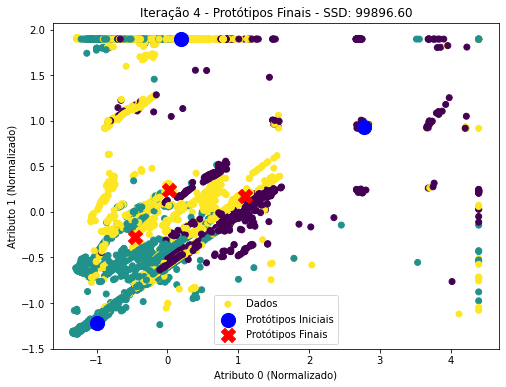

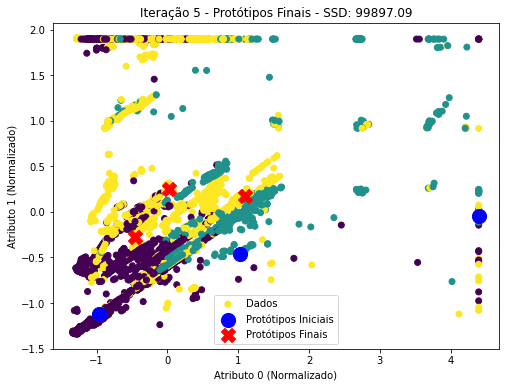

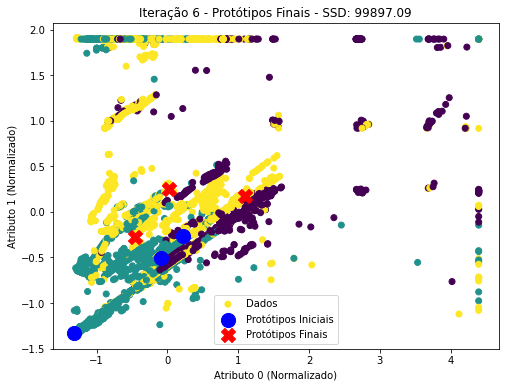

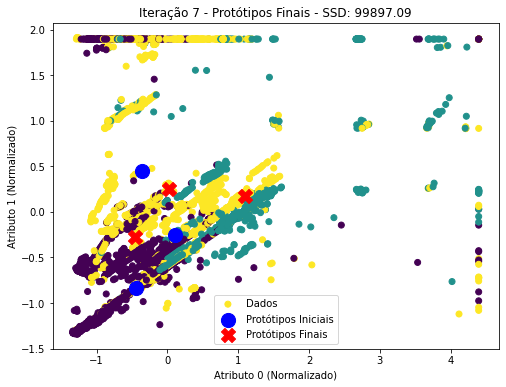

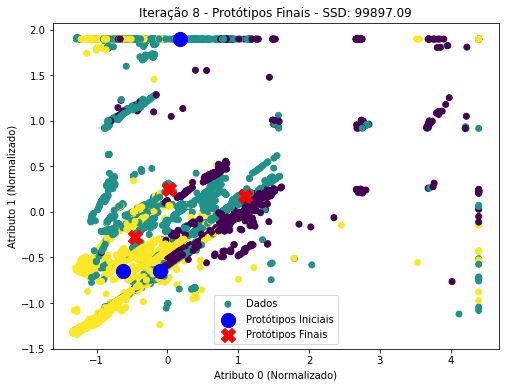

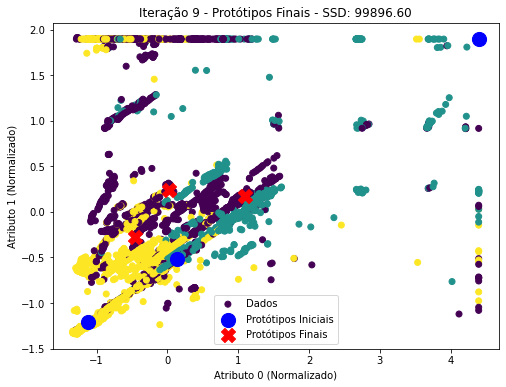

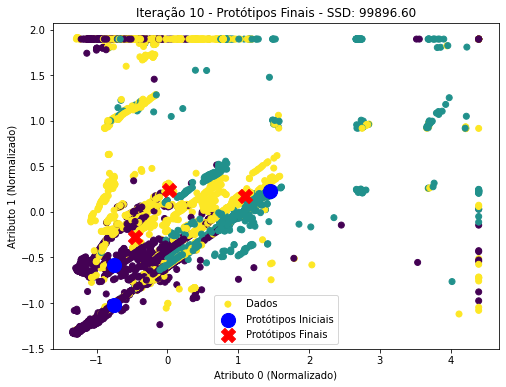

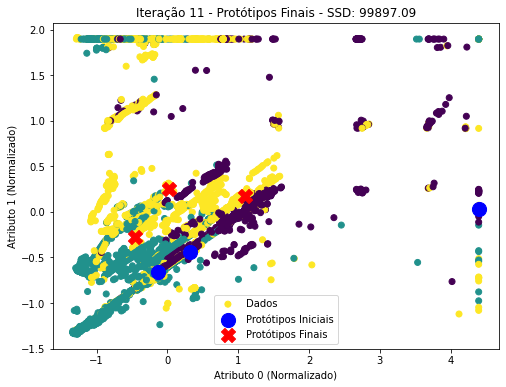

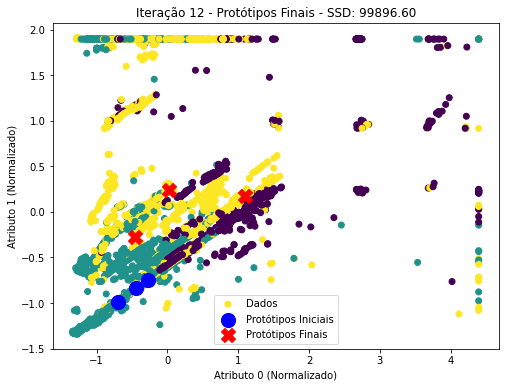

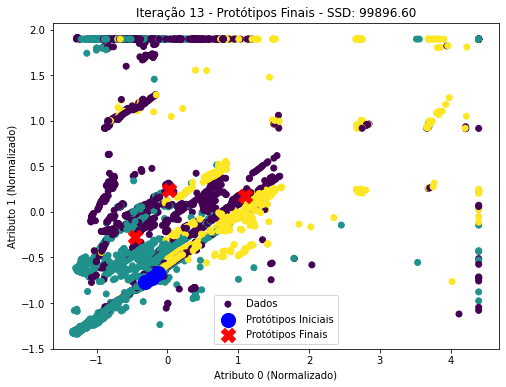

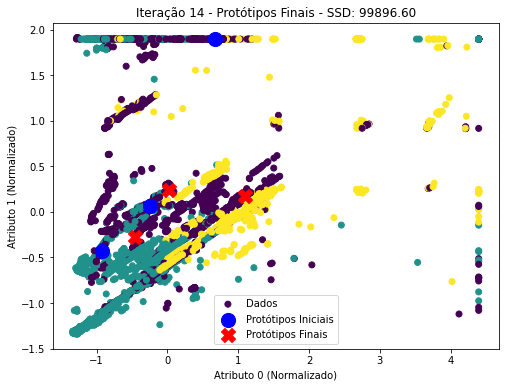

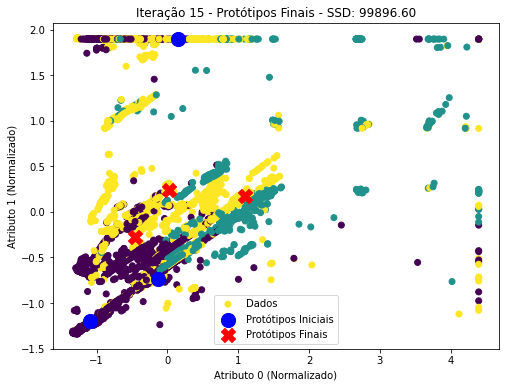

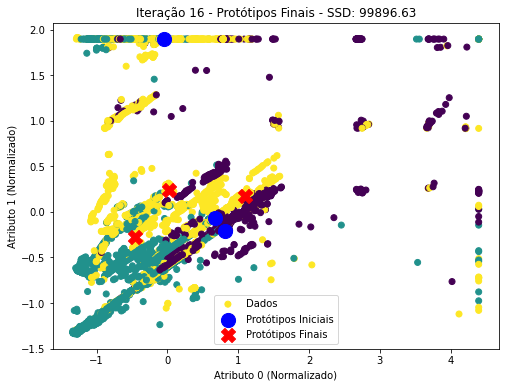

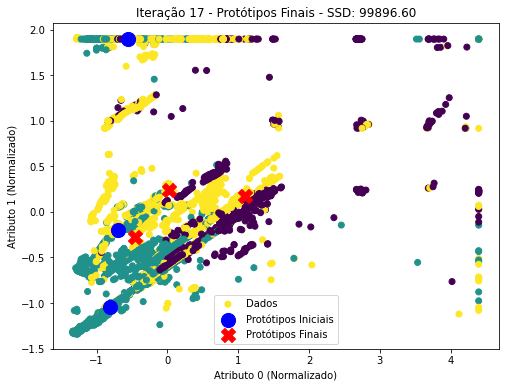

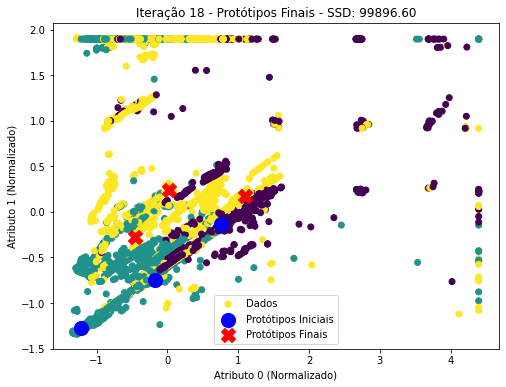

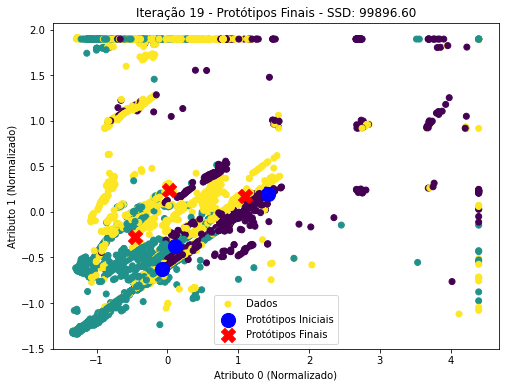

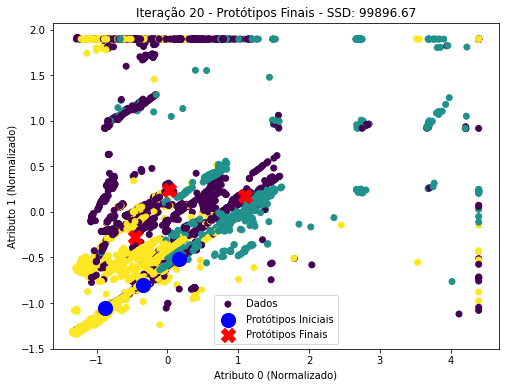

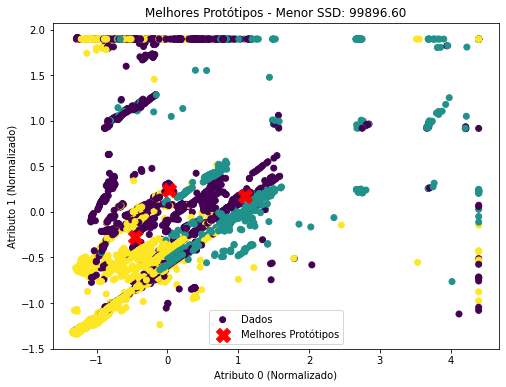

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados
url = "sensor_readings_24.data"
data = pd.read_csv(url, header=None)

# Normalizar os dados
normalized_data = (data.iloc[:, :-1] - data.iloc[:, :-1].mean()) / data.iloc[:, :-1].std()

# Definir um valor para K (n_clusters)
K = 3

# Inicializar variáveis para o loop
max_iterations = 20  # Ajuste conforme necessário
convergence_threshold = 1e-4
iteration = 0
best_prototypes = None
best_ssd = float('inf')

while iteration < max_iterations:
    # Atribuir valores iniciais aos protótipos (diferentes a cada iteração)
    prototypes = normalized_data.sample(n=K)
    initial_prototypes = prototypes.copy()  # Salvar a posição inicial dos protótipos
    
    while True:
        # Passo 3: Determinar a partição Vi(k)
        distances = np.linalg.norm(normalized_data.values[:, np.newaxis] - prototypes.values, axis=2)
        clusters = np.argmin(distances, axis=1)
        
        # Atualizar protótipos para a próxima iteração
        new_prototypes = pd.DataFrame(np.array([normalized_data[clusters == i].mean(axis=0) for i in range(K)]),
                                       columns=normalized_data.columns)
    
        # Verificar convergência
        if np.linalg.norm(new_prototypes.values - prototypes.values) < convergence_threshold:
            prototypes = new_prototypes.copy()
            break

        # Atualizar protótipos para a próxima iteração
        prototypes = new_prototypes.copy()

    # Calcular a SSD após convergência
    ssd = np.sum((normalized_data.values - prototypes.values[clusters]) ** 2)

    # Exibir os protótipos finais
    plt.figure(figsize=(8, 6))
    plt.scatter(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], c=clusters, cmap='viridis', label='Dados')
    plt.scatter(initial_prototypes.iloc[:, 0], initial_prototypes.iloc[:, 1], s=200, marker='o', c='blue', label='Protótipos Iniciais')
    plt.scatter(prototypes.iloc[:, 0], prototypes.iloc[:, 1], s=200, marker='X', c='red', label='Protótipos Finais')
    plt.title(f"Iteração {iteration + 1} - Protótipos Finais - SSD: {ssd:.2f}")
    plt.xlabel("Atributo 0 (Normalizado)")
    plt.ylabel("Atributo 1 (Normalizado)")
    plt.legend()
    plt.show()

    # Verificar se a atual iteração produz a menor SSD
    if ssd < best_ssd:
        best_ssd = ssd
        best_prototypes = prototypes.copy()

    # Incrementar a iteração
    iteration += 1

# Exibir os melhores protótipos
plt.figure(figsize=(8, 6))
plt.scatter(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], c=clusters, cmap='viridis', label='Dados')
plt.scatter(best_prototypes.iloc[:, 0], best_prototypes.iloc[:, 1], s=200, marker='X', c='red', label='Melhores Protótipos')
plt.title(f"Melhores Protótipos - Menor SSD: {best_ssd:.2f}")
plt.xlabel("Atributo 0 (Normalizado)")
plt.ylabel("Atributo 1 (Normalizado)")
plt.legend()
plt.show()
